In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import sys
import os
current_dir = os.getcwd()
github_path = os.path.abspath(os.path.join(current_dir, "../../"))
sys.path.append(github_path)
from plot_utils import *

# Weight of Evidence Visualization

## Random Data Generation and Categorization

This algorithm generates 200 random normalized values between 0 and 1 and classifies them into two groups based on binary outcomes (0 or 1). The outcomes are determined by a probability derived from a sigmoid function applied to each value.

The algorithm performs the following steps:
1. **Data Generation**: Creates random values and computes probabilities using the sigmoid function.
2. **Outcome Generation**: Assigns binary outcomes (0 or 1) based on the calculated probabilities.
3. **Categorization**: Segregates values into two groups based on the outcomes.
4. **Bad Value Counting**: Identifies and counts "bad" values in each group based on specified thresholds.
5. **Data Truncation**: Truncates the groups based on the counts of bad values, filtering the data for analysis.

The final output consists of truncated lists of generated values for further analysis or visualization.

In [3]:
def generate_random_data(n_samples):
    """Generate random normalized data and corresponding binary outcomes."""
    xrands0_orig = []
    yrands0_orig = []
    xrands1_orig = []
    yrands1_orig = []

    for _ in range(n_samples):
        xrand_raw = random.randint(0, 100)  # Generate a random integer between 0 and 100
        xrand = xrand_raw / 100.0  # Normalize to [0, 1]
        p = 1 / (1 + np.exp(-(8 * (xrand - 0.5))))  # Calculate probability using the sigmoid function
        yrand = random.choices([1, 0], weights=[p, 1 - p], k=1)[0]  # Generate binary outcome based on probability

        # Append to the respective lists based on the outcome
        if yrand == 0:
            xrands0_orig.append(xrand)
            yrands0_orig.append(yrand)
        else:
            xrands1_orig.append(xrand)
            yrands1_orig.append(yrand)

    return xrands0_orig, yrands0_orig, xrands1_orig, yrands1_orig

def count_bad_values(data, threshold, condition='less'):
    """Count bad values in a list based on a threshold."""
    count = 0
    for value in data:
        if (condition == 'less' and value < threshold) or (condition == 'greater' and value > threshold):
            count += 1
        else:
            break  # Stop counting when the condition is not met
    return count

def truncate_data(original_data, bad_count):
    """Truncate data based on bad counts."""
    if bad_count == 0:
        return original_data  # No truncation needed
    else:
        return original_data[:-bad_count]  # Truncate from the end

# Main execution
n_samples = 200
xrands0_orig, yrands0_orig, xrands1_orig, yrands1_orig = generate_random_data(n_samples)

# Sort the results
xrands0_orig.sort()
xrands1_orig.sort()

# Count "bad" values for visualization purposes
bad_cnt_0 = count_bad_values(xrands0_orig[::-1], 0.9, condition='greater')  # Count for > 0.9
bad_cnt_1 = count_bad_values(xrands1_orig, 0.1, condition='less')  # Count for < 0.1

# Truncate the original lists based on bad counts
xrands0 = truncate_data(xrands0_orig, bad_cnt_0)
yrands0 = truncate_data(yrands0_orig, bad_cnt_0)
xrands1 = truncate_data(xrands1_orig, bad_cnt_1)
yrands1 = truncate_data(yrands1_orig, bad_cnt_1)

# Output the results for verification
print("Truncated xrands0:", xrands0)
print("Truncated xrands1:", xrands1)
print("Truncated yrands0:", yrands0)
print("Truncated yrands1:", yrands1)


Truncated xrands0: [0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.04, 0.04, 0.04, 0.05, 0.06, 0.06, 0.07, 0.08, 0.09, 0.09, 0.1, 0.1, 0.11, 0.11, 0.11, 0.14, 0.14, 0.15, 0.16, 0.16, 0.18, 0.19, 0.19, 0.2, 0.2, 0.2, 0.21, 0.21, 0.21, 0.21, 0.23, 0.23, 0.24, 0.26, 0.26, 0.26, 0.28, 0.29, 0.29, 0.29, 0.3, 0.3, 0.3, 0.3, 0.31, 0.32, 0.32, 0.32, 0.32, 0.33, 0.33, 0.33, 0.34, 0.34, 0.38, 0.41, 0.41, 0.42, 0.42, 0.44, 0.44, 0.44, 0.46, 0.46, 0.47, 0.47, 0.48, 0.49, 0.5, 0.51, 0.51, 0.52, 0.52, 0.54, 0.57, 0.58, 0.65, 0.66, 0.66, 0.68, 0.69, 0.7, 0.78, 0.81, 0.86]
Truncated xrands1: [0.11, 0.13, 0.16, 0.22, 0.27, 0.33, 0.34, 0.37, 0.37, 0.38, 0.41, 0.42, 0.42, 0.43, 0.44, 0.45, 0.46, 0.46, 0.48, 0.49, 0.52, 0.52, 0.52, 0.52, 0.54, 0.54, 0.54, 0.55, 0.55, 0.57, 0.57, 0.6, 0.6, 0.61, 0.62, 0.63, 0.63, 0.64, 0.64, 0.65, 0.65, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.68, 0.68, 0.7, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.73, 0.74, 0.74, 0.74, 0.76, 0.76, 0.77, 0.77, 0.77, 0.78, 0.78, 0.78,

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1706/1538958333.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1706/1538958333.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


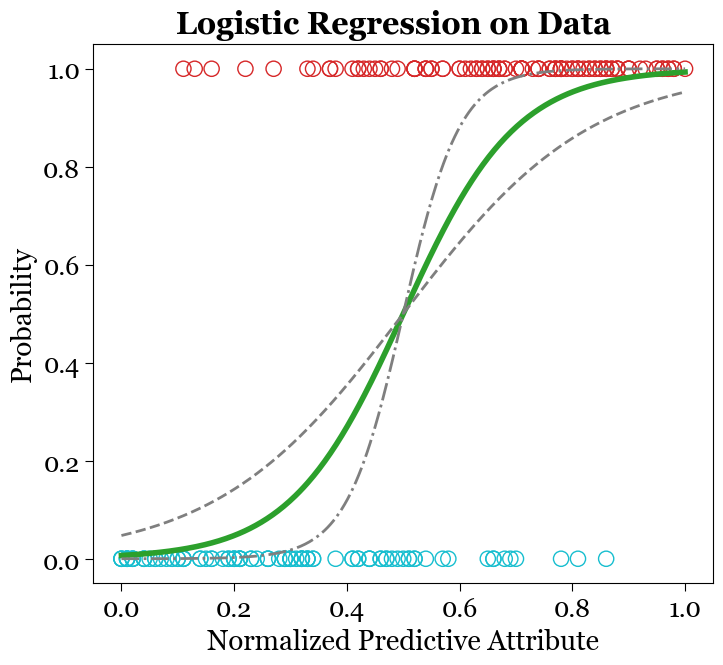

In [7]:
def sigmoid(x, scale):
    """Calculate the sigmoid function with a scaling factor."""
    return 1 / (1 + np.exp(-scale * (x - 0.5)))

def plot_sigmoids(x, scales, line_styles, colors, xrands0, yrands0, xrands1, yrands1):
    """Plot sigmoid functions and scatter data."""
    fig = plt.figure(figsize=(8, 7))
    ax = plt.gca()

    # Plot each sigmoid function with corresponding line style and color
    for scale, style, color in zip(scales, line_styles, colors):
        y = sigmoid(x, scale)
        plt.plot(x, y, linewidth=4 if scale == scales[0] else 2, color=color, linestyle=style)
    
    # Scatter plot for data points
    plt.scatter(xrands0, yrands0, s=120, edgecolors=tableau_colors[9], facecolors='none', marker='o')
    plt.scatter(xrands1, yrands1, s=120, edgecolors=tableau_colors[3], facecolors='none', marker='o')

    # Customize labels, title, and font
    font = {'family': 'Georgia', 'color': 'black', 'weight': 'normal', 'size': 20}
    plt.xlabel('Normalized Predictive Attribute', fontdict=font)
    plt.ylabel('Probability', fontdict=font)
    fig.suptitle('Logistic Regression on Data', fontproperties=suptitle_font, y=0.93)

    # Customize tick sizes
    ax.tick_params(axis='both', which='major', labelsize=18, length=6)
    ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
    ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

    # Display the plot
    # plt.savefig('./../plots/figures/logistic_regression_plot_without_woe.png', bbox_inches='tight')
    plt.show()
    
# Prepare data
x = np.linspace(0, 1, 400)
scales = [10, 20, 6]
line_styles = ['-', '-.', '--']
colors = [tableau_colors[2], tableau_colors[7], tableau_colors[7]]

# Call the plotting function
plot_sigmoids(x, scales, line_styles, colors, xrands0, yrands0, xrands1, yrands1)


## WoE and Log-Odds Before Binning

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1706/4290954828.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)


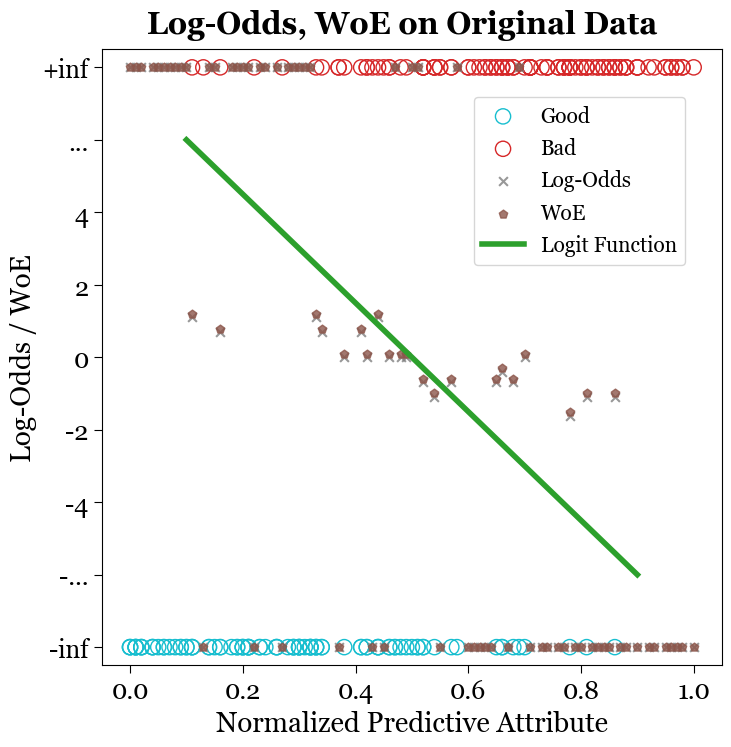

In [36]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# Calculate original WoE and log-odds
good_counts = Counter(xrands0)
bad_counts = Counter(xrands1)

log_odds = []
weights_of_evidence = []

# Iterate through 101 points for normalized attribute values (0 to 1)
for i in range(101):
    normalized_value = i / 100
    count_good = good_counts.get(normalized_value, 0)
    count_bad = bad_counts.get(normalized_value, 0)
    
    if count_good > 0 and count_bad > 0:
        ratio = count_good / count_bad
        log_odds_value = np.log(ratio)
        woe_value = np.log((count_good / len(xrands0)) / (count_bad / len(xrands1)))
    elif count_good > 0:  # Only good events present
        log_odds_value, woe_value = 8, 8
    elif count_bad > 0:  # Only bad events present
        log_odds_value, woe_value = -8, -8
    else:  # No events present
        log_odds_value, woe_value = np.nan, np.nan
    
    log_odds.append(log_odds_value)
    weights_of_evidence.append(woe_value)

# Linear function for plotting
def linear_function(x):
    return -15 * (x - 0.5)

# Prepare data for plotting
x_values = np.linspace(0.1, 0.9, 400)
linear_y_values = linear_function(x_values)
good_y_positions = [-8 for _ in xrands0]
bad_y_positions = [8 for _ in xrands1]
x_line_values = [i / 100 for i in range(101)]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot for good and bad labels
ax.scatter(xrands0, good_y_positions, s=120, edgecolors=tableau_colors[9], facecolors='none', marker='o', label='Good')
ax.scatter(xrands1, bad_y_positions, s=120, edgecolors=tableau_colors[3], facecolors='none', marker='o', label='Bad')

# Set axis limits and labels
ax.set_ylim(-8.5, 8.5)
fig.suptitle('Log-Odds, WoE on Original Data', fontproperties=suptitle_font, y=0.93)
ax.set_xlabel('Normalized Predictive Attribute', fontdict=font)
ax.set_ylabel('Log-Odds / WoE', fontdict=font)

# Configure y-tick positions and labels
y_tick_positions = [-8, -6, -4, -2, 0, 2, 4, 6, 8]
y_tick_labels = ['-inf', '-...', '-4', '-2', '0', '2', '4', '...', '+inf']
ax.set_yticks(y_tick_positions)
ax.set_yticklabels(y_tick_labels, fontdict=tick_font)

# Configure tick parameters for both axes
ax.tick_params(axis='both', which='both', labelsize=18, length=6)
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)

# Set major formatter for x-axis
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

# Plot log-odds and logit function
ax.scatter(x_line_values, log_odds, s=40, color=tableau_colors[7], marker='x', alpha=0.8, label='Log-Odds')

# Plot WoE values in a different color
ax.scatter(x_line_values, weights_of_evidence, s=40, color=tableau_colors[5], marker='p', alpha=0.8, label='WoE')
ax.plot(x_values, linear_y_values, linewidth=4, linestyle='-', label='Logit Function', color=tableau_colors[2])

# Add legend
legend = ax.legend(loc=(0.6, 0.65), prop={'family': 'Georgia', 'size': 15, 'weight': 'normal'})

# Uncomment to save the plot
# plt.savefig('./../plots/figures/woe_original.png', bbox_inches='tight')
plt.show()


## WoE and Log-Odds After 10-Bin

Log-Odds (4 bins): [8, np.float64(1.466337068793427), np.float64(2.1400661634962708), np.float64(1.0986122886681098), np.float64(0.26236426446749106), np.float64(-0.3184537311185346), np.float64(-1.2809338454620642), np.float64(-2.3978952727983707), np.float64(-2.3025850929940455), -8]
WoE (4 bins): [8, np.float64(1.5664205273504097), np.float64(2.240149622053253), np.float64(1.1986957472250923), np.float64(0.36244772302447376), np.float64(-0.21837027256155211), np.float64(-1.180850386905082), np.float64(-2.297811814241388), np.float64(-2.202501634437063), -8]


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1706/1388403781.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)


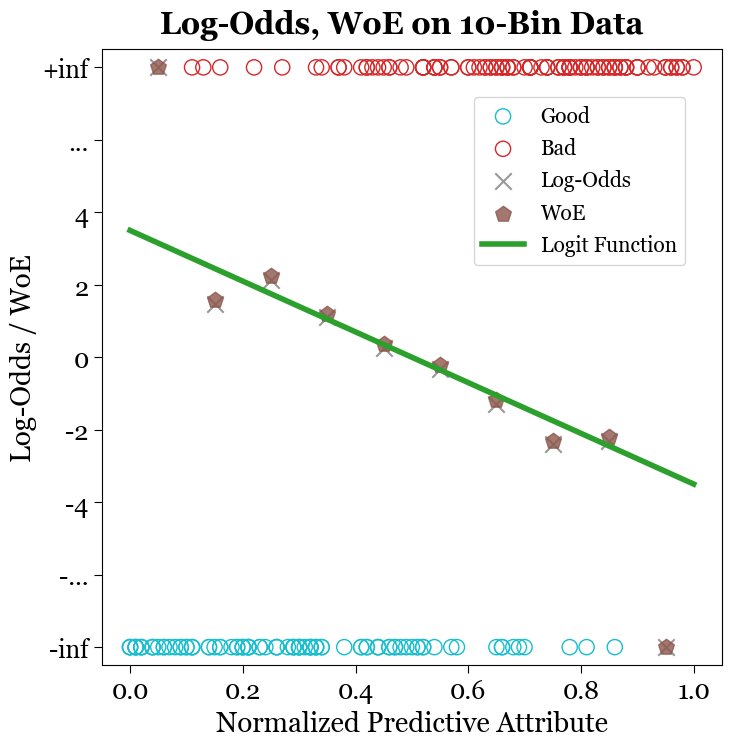

In [89]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# Initialize bin counts for 4 bins
num_bins_10 = 10
bin_counts_good_10 = [0] * num_bins_10  # Counts for good events
bin_counts_bad_10 = [0] * num_bins_10    # Counts for bad events

# Count occurrences in bins for good events
for xrand in xrands0:
    x_index = min(int(num_bins_10 * xrand), num_bins_10 - 1)  # Ensure index is within bounds
    bin_counts_good_10[x_index] += 1

# Count occurrences in bins for bad events
for xrand in xrands1:
    x_index = min(int(num_bins_10 * xrand), num_bins_10 - 1)  # Ensure index is within bounds
    bin_counts_bad_10[x_index] += 1

# Initialize lists for log-odds and WoE
log_odds_10 = []
weights_of_evidence_10 = []

# Calculate log-odds and WoE for each bin
for i in range(num_bins_10):
    count_good = bin_counts_good_10[i]
    count_bad = bin_counts_bad_10[i]
    total_good = len(xrands0)
    total_bad = len(xrands1)

    if count_good > 0 and count_bad > 0:
        # Both counts exist
        ratio = count_good / count_bad
        log_odds_value = np.log(ratio)
        wo_e_value = np.log((count_good / total_good) / (count_bad / total_bad))
    elif count_bad == 0:
        # Only good events present
        log_odds_value, wo_e_value = 8, 8
    elif count_good == 0:
        # Only bad events present
        log_odds_value, wo_e_value = -8, -8
    else:
        # No events present
        log_odds_value, wo_e_value = np.nan, np.nan

    log_odds_10.append(log_odds_value)
    weights_of_evidence_10.append(wo_e_value)

# Print calculated values for verification
print("Log-Odds (4 bins):", log_odds_10)
print("WoE (4 bins):", weights_of_evidence_10)

# Prepare for plotting
def linear_function_4(x):
    return -7 * (x - 0.5)

x_values_10 = np.linspace(0, 1, 400)
y_linear_10 = linear_function_4(x_values_10)

# Calculate offset and x_line for bins
offset = 0.5 / num_bins_10
x_line_values_10 = [(i / num_bins_10 + offset) for i in range(num_bins_10)]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot for good and bad labels
good_y_positions_10 = [-8 for _ in xrands0]
bad_y_positions_10 = [8 for _ in xrands1]

# Scatter plot for good and bad events
ax.scatter(xrands0, good_y_positions_10, s=120, edgecolors=tableau_colors[9], facecolors='none', marker='o', label='Good')
ax.scatter(xrands1, bad_y_positions_10, s=120, edgecolors=tableau_colors[3], facecolors='none', marker='o', label='Bad')

# Set axis limits and labels
ax.set_ylim(-8.5, 8.5)
fig.suptitle('Log-Odds, WoE on 10-Bin Data', fontproperties=suptitle_font, y=0.93)
ax.set_xlabel('Normalized Predictive Attribute', fontdict=font)
ax.set_ylabel('Log-Odds / WoE', fontdict=font)

# Configure y-tick positions and labels
y_tick_positions = [-8, -6, -4, -2, 0, 2, 4, 6, 8]
y_tick_labels = ['-inf', '-...', '-4', '-2', '0', '2', '4', '...', '+inf']
ax.set_yticks(y_tick_positions)
ax.set_yticklabels(y_tick_labels, fontdict=tick_font)

# Configure tick parameters for both axes
ax.tick_params(axis='both', which='both', labelsize=18, length=6)
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

# Plot log-odds and WoE values
ax.scatter(x_line_values_10, log_odds_10, s=140, color=tableau_colors[7], marker='x', alpha=0.8, label='Log-Odds')
ax.scatter(x_line_values_10, weights_of_evidence_10, s=140, color=tableau_colors[5], marker='p', alpha=0.8, label='WoE')
ax.plot(x_values_10, y_linear_10, linewidth=4, linestyle='-', color=tableau_colors[2], label='Logit Function')

# Add legend
ax.legend(loc=(0.6, 0.65), prop={'family': 'Georgia', 'size': 15, 'weight': 'normal'})

# Show plot
# plt.savefig('./../plots/figures/woe_10_bin.png', bbox_inches='tight')
plt.show()


## WoE and Log-Odds After 4-Bin

Log-Odds (4 bins): [np.float64(2.3749057545736716), np.float64(0.7827593392496325), np.float64(-1.0498221244986778), np.float64(-2.70805020110221)]
WoE (4 bins): [np.float64(2.4749892131306543), np.float64(0.8828427978066148), np.float64(-0.9497386659416952), np.float64(-2.6079667425452273)]


/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1706/3044058714.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)


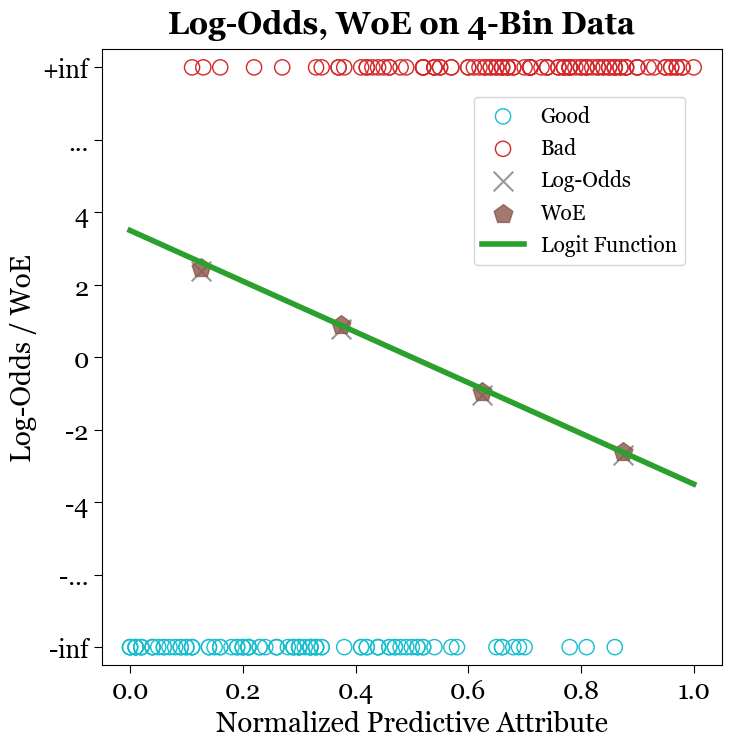

In [90]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# Initialize bin counts for 4 bins
num_bins_4 = 4
bin_counts_good_4 = [0] * num_bins_4  # Counts for good events
bin_counts_bad_4 = [0] * num_bins_4    # Counts for bad events

# Count occurrences in bins for good events
for xrand in xrands0:
    x_index = min(int(num_bins_4 * xrand), num_bins_4 - 1)  # Ensure index is within bounds
    bin_counts_good_4[x_index] += 1

# Count occurrences in bins for bad events
for xrand in xrands1:
    x_index = min(int(num_bins_4 * xrand), num_bins_4 - 1)  # Ensure index is within bounds
    bin_counts_bad_4[x_index] += 1

# Initialize lists for log-odds and WoE
log_odds_4 = []
weights_of_evidence_4 = []

# Calculate log-odds and WoE for each bin
for i in range(num_bins_4):
    count_good = bin_counts_good_4[i]
    count_bad = bin_counts_bad_4[i]
    total_good = len(xrands0)
    total_bad = len(xrands1)

    if count_good > 0 and count_bad > 0:
        # Both counts exist
        ratio = count_good / count_bad
        log_odds_value = np.log(ratio)
        wo_e_value = np.log((count_good / total_good) / (count_bad / total_bad))
    elif count_bad == 0:
        # Only good events present
        log_odds_value, wo_e_value = 8, 8
    elif count_good == 0:
        # Only bad events present
        log_odds_value, wo_e_value = -8, -8
    else:
        # No events present
        log_odds_value, wo_e_value = np.nan, np.nan

    log_odds_4.append(log_odds_value)
    weights_of_evidence_4.append(wo_e_value)

# Print calculated values for verification
print("Log-Odds (4 bins):", log_odds_4)
print("WoE (4 bins):", weights_of_evidence_4)

# Prepare for plotting
def linear_function_4(x):
    return -7 * (x - 0.5)

x_values_4 = np.linspace(0, 1, 400)
y_linear_4 = linear_function_4(x_values_4)

# Calculate offset and x_line for bins
offset = 0.5 / num_bins_4
x_line_values_4 = [(i / num_bins_4 + offset) for i in range(num_bins_4)]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot for good and bad labels
good_y_positions_4 = [-8 for _ in xrands0]
bad_y_positions_4 = [8 for _ in xrands1]

# Scatter plot for good and bad events
ax.scatter(xrands0, good_y_positions_4, s=120, edgecolors=tableau_colors[9], facecolors='none', marker='o', label='Good')
ax.scatter(xrands1, bad_y_positions_4, s=120, edgecolors=tableau_colors[3], facecolors='none', marker='o', label='Bad')

# Set axis limits and labels
ax.set_ylim(-8.5, 8.5)
fig.suptitle('Log-Odds, WoE on 4-Bin Data', fontproperties=suptitle_font, y=0.93)
ax.set_xlabel('Normalized Predictive Attribute', fontdict=font)
ax.set_ylabel('Log-Odds / WoE', fontdict=font)

# Configure y-tick positions and labels
y_tick_positions = [-8, -6, -4, -2, 0, 2, 4, 6, 8]
y_tick_labels = ['-inf', '-...', '-4', '-2', '0', '2', '4', '...', '+inf']
ax.set_yticks(y_tick_positions)
ax.set_yticklabels(y_tick_labels, fontdict=tick_font)

# Configure tick parameters for both axes
ax.tick_params(axis='both', which='both', labelsize=18, length=6)
ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

# Plot log-odds and WoE values
ax.scatter(x_line_values_4, log_odds_4, s=200, color=tableau_colors[7], marker='x', alpha=0.8, label='Log-Odds')
ax.scatter(x_line_values_4, weights_of_evidence_4, s=200, color=tableau_colors[5], marker='p', alpha=0.8, label='WoE')
ax.plot(x_values_4, y_linear_4, linewidth=4, linestyle='-', color=tableau_colors[2], label='Logit Function')

# Add legend
ax.legend(loc=(0.6, 0.65), prop={'family': 'Georgia', 'size': 15, 'weight': 'normal'})

# Show plot
# plt.savefig('./../plots/figures/woe_4_bin.png', bbox_inches='tight')
plt.show()
